## Contents: Week 03 lab

1. [Creating your own Python module](#Creating-your-own-Python-module)
2. [WCOA 2013 cruise data analysis, continued](#WCOA-2013-cruise-data-analysis,-continued)

## Creating your own Python module

Up to this point, we have created functions and used them within the same Python script. However, what if we want to use those functions in another file, or another project entirely? To do this you can create your own module that can be imported in another Python scripts.

### Running a file as a script from the shell command line

To show how modules work in Python, we start with a simple unit conversion module contained in the file [convert.py](scripts/convert.py):

```python
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

'''A module for converting units.'''

def temp_f2c(f):
	''' This function converts Fahrenheit to Celcius
	Input: temperature in degrees F
	Output: temperature in degrees C
	'''
	c = (f - 32.0)*(5.0/9.0)
	return(c)
	
def temp_c2f(c):
	''' This function converts Celcius to Fahrenheit
	Input: temperature in degrees C
	Output: temperature in degrees F
	'''
	f = c*(9/5) + 32
	return(f)
	
if __name__ == '__main__':
	print('do this stuff if run as script')
	print('32 degrees F:',temp_f2c(32),'C')
```

#### Breaking down parts of the file

This Python file has several parts. The first two lines are comment lines, and are therefore not run as Python code. However, they contain important information about the file and they are include automatically when you create a new file in Spyder. The first line,

```python
#!/usr/bin/env python3
```

is the "shebang" line, and this is specific to Unix-based operating systems (like Mac OSX and Linux). It tells the shell that this file can be run as a scipt. The second line,

```python
# -*- coding: utf-8 -*-
```

specifies how the text file that contains the source code is formatted. This line allows you to use Unicode characters. Both of these lines are optional. The next line,

```python
'''A module for converting units.'''
```

is a docstring for the module, which helps a user figure out what is in the module and what its purpose is. Like the comment lines, this line is not run as code. After the doc-string, two function are defined, and then comes another part of the file.

```python
if __name__ == '__main__':
	print('do this stuff if run as script')
	print('32 degrees F:',temp_f2c(32),'C')
```
#### Running the file

The part of the file above is only run as a script (not when it is imported as a module in another Python file, which is what will be demonstrated in the next section). In Spyder, this can be done with the "Run" button. Python scripts can also be run from the shell (e.g. Mac Terminal, or Git Bash shell). The convert.py file can be run by navigating to its directory in the shell and typing

```
python convert.py
```

which gives the following output:

```
do this stuff if run as script                                                                              
32 degrees F: 0.0 C       
```

Running a python file in this way executes all of the Python code in the file, including the contents of the section that starts with `if __name__ == '__main__':`

### Importing as a module

To show how to import the convert.py as a module, and use the functions in another file, we create a simple script called [myscript.py](scripts/myscipt.py):

```python
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import convert

ctemp = 40
ftemp = convert.temp_c2f(ftemp)
print(ctemp,'C is ',ftemp,'F')
```

#### The import statement

In the file above, the conversion module is imported with the statement:

```python
import convert
```
The functions in that module can then be used, like in the line:

```python
ftemp = convert.temp_c2f(ftemp)
```

#### Running the file

This file can be run from the shell, with the command,

```
python myscript.py
```

which gives the following output:

```
40 C is  104.0 F   
```

It is also important to note what is code is _not_ run, which is the contents of the `if __name__ == '__main__':` section of convert.py. When a Python file is imported as a module, this part of the code is not run. This is a good place to put demonstrations of functions in a module, or tests.

#### Setting your PYTHONPATH

In order to import a module, Python has to know where to look for it. It knows to look in the current diectory (say, the directory from which you are running a script), but it does not search your entire computer.

With the PYTHONPATH environment variable, you can specify other directories where Python should look for modules. 

* One way to modify your Python path is through the menu in Spyder. 

* You can add a directory (e.g. `path/to/Modules`) to your PYTHONPATH with the following Python commands:
```python
import sys
sys.path.append("path/to/Modules")
```

A good way to keep track of things is to keep all of your useful modules in one directory on your computer, then add that single directory to your PYTHONPATH. If you ever want to share your code with somebody else, it will help to not have files scattered all over your computer. See [this blog post by Brown Dwarf Research](http://www.bdnyc.org/2012/09/editing-pythonpath-to-import-modules/), where the above example came from, for more really useful information.

#### Exercises

* Write two more unit conversion functions (converting one way and back).
* Use one in the `if __name__ == '__main__':` section of convert.py
* Use the other in myscript.py
* Run these files from the shell, and see what parts of the code are run

## WCOA 2013 cruise data analysis, continued

In this part of the tutorial, we will go over the basics of working with dates in Pandas and Numpy, make some exploratory plots and start a regression analysis. The data exploration will be largely guided by student interest.

In [4]:
%matplotlib notebook
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt

Like last week, we use Pandas to import the csv data file. Here, there is an addition `parse_dates` argument. The numbers in double brackets `[[8,9]]` indicate which columns to interpret as dates.

In [5]:
filename = 'data/week02_wcoa_cruise/WCOA2013_hy1.csv'
df = pd.read_csv(filename,header=31,na_values=-999,
                 parse_dates=[[8,9]])

In [6]:
df.head()

,DATE_TIME,EXPOCODE,SECT_ID,LEG,LINE,STNNBR,CASTNO,BTLNBR,BTLNBR_FLAG_W,LATITUDE,...,TCARBN,TCARBN_FLAG_W,ALKALI,ALKALI_FLAG_W,PH_TOT,PH_TOT_FLAG_W,PH_TMP,CO32,CO32__FLAG_W,CHLORA
0,2013-08-05 02:12:20,317W20130803,WCOA2013,1,2,11,1,1,2,48.2,...,2370.2,2,2369.0,2,7.294,2,25.0,NaN,9,NaN
1,2013-08-05 02:12:53,317W20130803,WCOA2013,1,2,11,1,2,2,48.2,...,NaN,9,NaN,9,7.295,2,25.0,NaN,9,NaN
2,2013-08-05 02:19:58,317W20130803,WCOA2013,1,2,11,1,3,2,48.2,...,2349.6,2,2343.7,2,7.282,2,25.0,43.521,3,NaN
3,2013-08-05 02:27:01,317W20130803,WCOA2013,1,2,11,1,4,2,48.2,...,2318.7,2,2311.9,2,7.287,2,25.0,45.641,2,NaN
4,2013-08-05 02:30:53,317W20130803,WCOA2013,1,2,11,1,5,2,48.2,...,2300.0,2,2299.7,2,7.308,2,25.0,47.741,2,NaN


Instead of strings, the dates are now in a special `datetime64` format. This means that, instead of treating the dates in the same way as any other collection of characters, pandas and NumPy can understand how this variable represents time.

In [19]:
df['DATE_TIME'].head()

0   2013-08-05 02:12:20
1   2013-08-05 02:12:53
2   2013-08-05 02:19:58
3   2013-08-05 02:27:01
4   2013-08-05 02:30:53
Name: DATE_TIME, dtype: datetime64[ns]

For example, subtracting `datetime64` objects with pandas gives a `Timedelta` object, which is specifically used to represent differences between times. The first two samples in the cruise data are separated by 33 seconds (the time between firing of bottles).

In [8]:
df['DATE_TIME'][1]-df['DATE_TIME'][0]

Timedelta('0 days 00:00:33')

In addition, pyplot automatically understands `datetime64` objects so it is easy to see how the ship moved between stations from north to south as weeks passed.

<IPython.core.display.Javascript object>


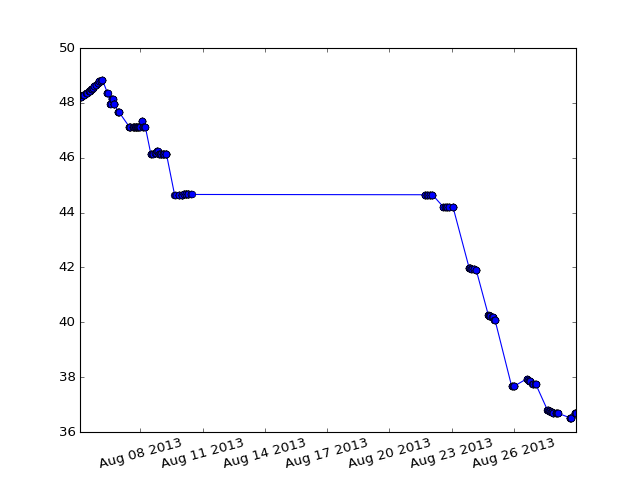

(array([ 735088.,  735091.,  735094.,  735097.,  735100.,  735103.,  735106.]),
 <a list of 7 Text xticklabel objects>)

In [9]:
plt.plot(df['DATE_TIME'],df['LATITUDE'],'-o')
plt.xticks(rotation=15)

The `scatter()` function allows points to be colored according to the value of a variable. In the case of dates, later dates are shown as warmer colors.

<IPython.core.display.Javascript object>


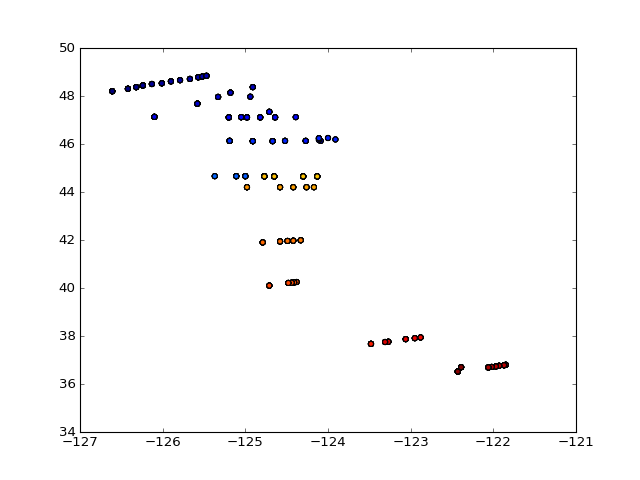

In [20]:
plt.figure()
plt.scatter(df['LONGITUDE'],df['LATITUDE'],c=df['DATE_TIME'])

#### Execrises

* What scientfic questions can be addressed with this data set?
* What relationships might occur between different variables?
* What differences might occur within the same variables, but at different locations or times?
* Create exploratory plots
* Do a correlation and regression analysis. Obtain r and p values. Draw both the regression of _y_ on _x_, and the regression of _x_ on _y_.

In [11]:
df.keys()

Index(['DATE_TIME', 'EXPOCODE', 'SECT_ID', 'LEG', 'LINE', 'STNNBR', 'CASTNO',
       'BTLNBR', 'BTLNBR_FLAG_W', 'LATITUDE', 'LONGITUDE', 'DEPTH', 'CTDPRS',
       'CTDTMP', 'CTDSAL', 'CTDSAL_FLAG_W', 'CTDOXY', 'CTDOXY_FLAG_W',
       'SALNTY', 'SALNTY_FLAG_W', 'OXYGEN', 'OXYGEN_FLAG_W', 'SILCAT',
       'SILCAT_FLAG_W', 'NITRAT', 'NITRAT_FLAG_W', 'NITRIT', 'NITRIT_FLAG_W',
       'PHSPHT', 'PHSPHT_FLAG_W', 'AMMONI', 'AMMONI_FLAG_W', 'TCARBN',
       'TCARBN_FLAG_W', 'ALKALI', 'ALKALI_FLAG_W', 'PH_TOT', 'PH_TOT_FLAG_W',
       'PH_TMP', 'CO32', 'CO32__FLAG_W', 'CHLORA'],
      dtype='object')